# 4.2.1.1 Logistic Regression

## Explanation of Logistic Regression and Its Applications

**Logistic Regression** is a statistical method used for binary classification problems, where the response variable can take one of two possible outcomes (e.g., success/failure, yes/no, positive/negative). Unlike linear regression, which predicts a continuous output, logistic regression predicts the probability that a given input point belongs to a particular class.

**Key Concepts**:

- **Logit Function**: The core of logistic regression is the logit function, which is the natural logarithm of the odds of the dependent event. It is defined as:
  $$\text{logit}(p) = \log\left(\frac{p}{1-p}\right)$$
  where $ p $ is the probability of the positive class.

- **Sigmoid Function**: To convert the linear output of the regression model to a probability, logistic regression uses the sigmoid function:
  $$
  \sigma(z) = \frac{1}{1 + e^{-z}}
  $$
  where $ z $ is the linear combination of the input features and their corresponding coefficients.

- **Decision Boundary**: The threshold value (typically 0.5) used to classify the predicted probability into one of the two classes. If $ p \geq 0.5 $, the output is classified as the positive class; otherwise, it is classified as the negative class.

**Applications of Logistic Regression**:

- **Medical Diagnosis**: Predicting the presence or absence of a disease based on patient characteristics and medical test results.
- **Credit Scoring**: Assessing the likelihood that a loan applicant will default on their loan based on financial history and other factors.
- **Marketing**: Predicting whether a customer will purchase a product based on their demographics and past behavior.
- **Spam Detection**: Classifying emails as spam or not spam based on their content and metadata.

Logistic regression is widely used due to its simplicity, interpretability, and effectiveness in handling binary classification problems.


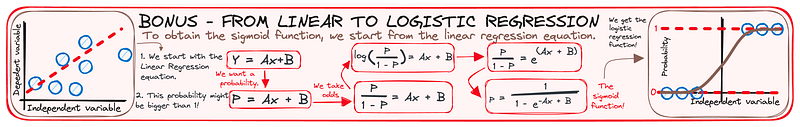

## Procedure for Implementing Logistic Regression

1. **Data Preparation**:
   - Collect and preprocess the data, including handling missing values, encoding categorical variables, and scaling numerical features.
   - Split the data into training and test sets.

2. **Model Training**:
   - Fit the logistic regression model to the training data using maximum likelihood estimation.

3. **Model Prediction**:
   - Use the trained model to predict probabilities and class labels for the test data.

4. **Model Evaluation**:
   - Evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score, and the area under the ROC curve (AUC-ROC).


___
___
### Redings:
- [What is Logistic Regression?](https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/)
- [The math behind Logistic Regression](https://medium.com/analytics-vidhya/the-math-behind-logistic-regression-c2f04ca27bca)
- [A Visual Understanding of Logistic Regression](https://readmedium.com/en/https:/towardsdatascience.com/a-visual-understanding-of-logistic-regression-2e6733844397)
- [In-depth Exploration of Confusion Matrix and Derived Metrics](https://readmedium.com/en/https:/ai.plainenglish.io/comprehensive-evaluation-of-classification-models-an-in-depth-exploration-of-confusion-matrix-and-eb58663e9a24)
- [Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)
___
___

- ## Implementing Logistic Regression using scikit-learn

In [1]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
# Generating some random binary classification data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2)
Y = (X[:, 0] + X[:, 1] > 1).astype(int)

In [3]:
# Splitting the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Implementing Logistic Regression using scikit-learn
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

# Predicting
Y_pred = log_reg.predict(X_test)
Y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

In [4]:
# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred_proba)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC AUC: 1.0


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(Y_test, Y_pred)

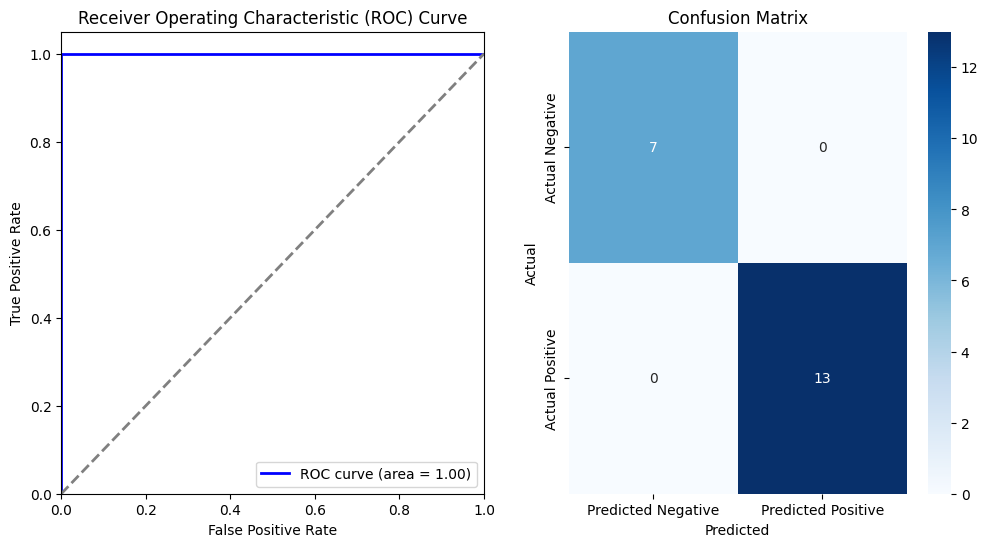

In [6]:
# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.subplot(122)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

___
___
- ### Implementing Logistic Regression from Scratch

In [7]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [8]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.num_iterations):
            self.update_weights()
    
    def update_weights(self):
        A = self.sigmoid(np.dot(self.X, self.W) + self.b)
        temp = (A - self.Y.T)
        temp = np.reshape(temp, self.m)
        dW = np.dot(self.X.T, temp) / self.m
        db = np.sum(temp) / self.m
        
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
    
    def predict(self, X):
        Z = self.sigmoid(np.dot(X, self.W) + self.b)
        Y = np.where(Z > 0.5, 1, 0)
        return Y

In [9]:
# Generating some random binary classification data for demonstration
np.random.seed(0)
X = np.random.rand(100, 2)
Y = (X[:, 0] + X[:, 1] > 1).astype(int)

In [10]:
# Splitting the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Implementing Logistic Regression from scratch
log_reg_scratch = LogisticRegressionScratch(learning_rate=0.1, num_iterations=1000)
log_reg_scratch.fit(X_train, Y_train)

# Predicting
Y_pred_scratch = log_reg_scratch.predict(X_test)

In [11]:
# Evaluating the model
accuracy_scratch = accuracy_score(Y_test, Y_pred_scratch)
precision_scratch = precision_score(Y_test, Y_pred_scratch)
recall_scratch = recall_score(Y_test, Y_pred_scratch)
f1_scratch = f1_score(Y_test, Y_pred_scratch)

print(f'Accuracy (Scratch): {accuracy_scratch}')
print(f'Precision (Scratch): {precision_scratch}')
print(f'Recall (Scratch): {recall_scratch}')
print(f'F1-Score (Scratch): {f1_scratch}')

Accuracy (Scratch): 1.0
Precision (Scratch): 1.0
Recall (Scratch): 1.0
F1-Score (Scratch): 1.0


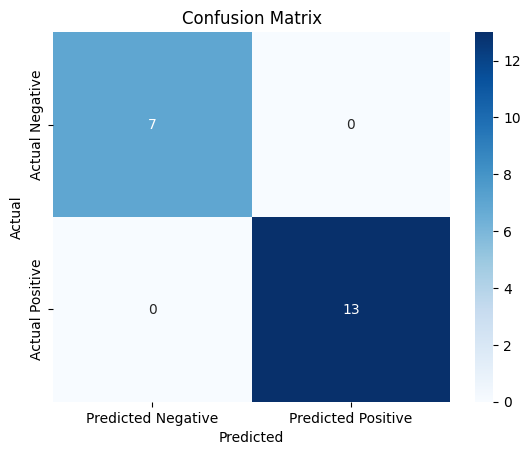

In [12]:
conf_matrix = confusion_matrix(Y_test, Y_pred_scratch)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

Logistic Regression is a fundamental binary classification technique that models the probability of a binary outcome using the logistic function. It is widely used in various fields due to its simplicity, interpretability, and efficiency. Implementing **Logistic Regression** using `scikit-learn` is straightforward and efficient, while implementing it from scratch provides a deeper understanding of the underlying principles and mathematics. Evaluating the model using metrics such as `accuracy`, `precision`, `recall`, `F1-score`, and `ROC AUC` helps in assessing its performance and making necessary adjustments for better results.
